## CR

Links:
* https://data.gov.cz/
    

### CR - vyvoj poctu obyvatel v Brne

{2001: 373272, 2002: 370505, 2003: 369559, 2004: 367729, 2005: 366757, 2006: 366680, 2007: 368533, 2008: 370592, 2009: 371399, 2010: 371371, 2011: 378965, 2012: 378327, 2013: 377508, 2014: 377440, 2015: 377028, 2016: 377549, 2017: 379527}


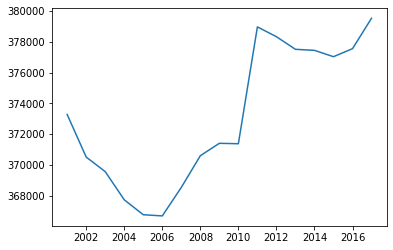

In [43]:
import numpy as np
import matplotlib.pyplot as plt 

year_to_count = {}
with open('/Users/jumar/Private/edu/DataScience/datasets/CR/vyvoj-poctu-obyvatel-v-brne_2.csv') as f:
    raw_data = f.readlines()[1:]
    for citizen_count_in_year in raw_data:
        year, count = citizen_count_in_year.rstrip('\n;').split(';') 
        year_to_count[int(year)] = int(count);
print(year_to_count)

# https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
plt.plot(list(year_to_count.keys()), list(year_to_count.values()))